

# Project: Investigate a Dataset - [no show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.

● ‘Neighborhood’ indicates the
location of the hospital.

● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.


### Question(s) for Analysis
- what is the percentage of show-up vs. no show-up?
- What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [264]:
#importing important files 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [265]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [266]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [267]:
# Renaming the columns' names so it's easy to use

df.columns = [x.lower().replace("-", "_") for x in list(df.columns)]
df.rename(columns={"hipertension": "hypertension"});

In [268]:
df.shape

(110527, 14)

There are 110527 row and 14 columns

In [269]:
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Looks like there are some wrong data wo need to clean:
- there are some ages under 0.
- there are some ages over 100.

In [270]:
# the out of age range data
out_range = df.query('age < 0').append(df.query('age > 100'))
out_range

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No
58014,9.762948e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
90372,2.342836e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null float64
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null object
appointmentday    110527 non-null object
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no_show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There is no null values.

In [272]:
df.duplicated().sum()

0

In [273]:
df.duplicated('patientid').sum()

48228

In [274]:
df.duplicated(['patientid','no_show']).sum()

38710

These data is repeated and need to be cleaned.

### Summary of wrangling 

After importing data I took a look at it I noted what I will do
- dropping repeated,wrong or unuseful values
- dropping some columns and rename others
- filter the data by show or no show 


# Data Cleaning


#### cleaning unnecessary

In [275]:
no_need_cols = ['patientid' ,'appointmentid' ,'scheduledday' , 'appointmentday']

df.drop(out_range.index, inplace=True)
df.drop_duplicates(['patientid','no_show'], inplace=True)
df.drop(columns=no_need_cols, inplace=True)

In [276]:
df.head()

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [277]:
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,71811.000000,71811.000000,71811.000000,71811.000000,71811.000000,71811.000000,71811.000000
mean,36.522399,0.095542,0.195068,0.070964,0.025038,0.020108,0.335575
std,23.371018,0.293965,0.396256,0.256767,0.156241,0.155257,0.472194
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [278]:
# Creating a separate data frame for if the patiant came or not
df_show = df.query('no_show == "No"')
df_noshow = df.query('no_show == "Yes"')

<a id='eda'></a>
## Exploratory Data Analysis



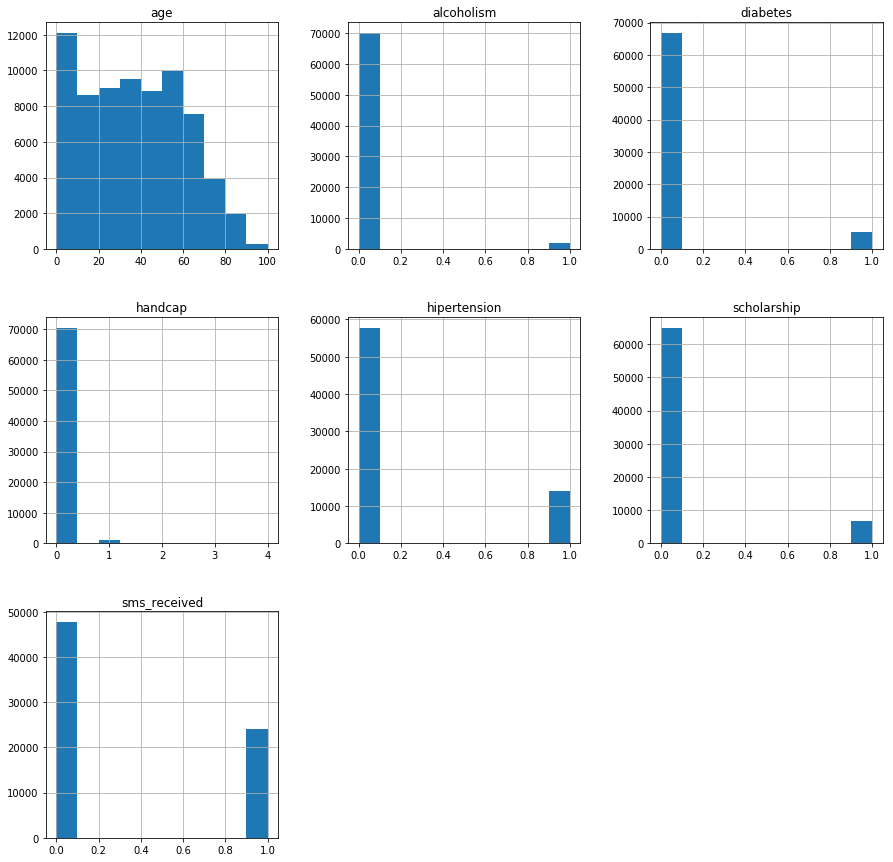

In [279]:
#taking a look of all the data all the data
df.hist(figsize=(15,15));

In [280]:
df_show.count()

gender           54149
age              54149
neighbourhood    54149
scholarship      54149
hipertension     54149
diabetes         54149
alcoholism       54149
handcap          54149
sms_received     54149
no_show          54149
dtype: int64

In [281]:
df_noshow.count()

gender           17662
age              17662
neighbourhood    17662
scholarship      17662
hipertension     17662
diabetes         17662
alcoholism       17662
handcap          17662
sms_received     17662
no_show          17662
dtype: int64

 The number of those who showed was about 3 times those who did not show.

In [282]:
# creating a Function for plotting
def ploting_bar(compared, c_color):
    plt.figure(figsize=(10,10))
    df_show[compared].hist(alpha= 0.5, label = 'show', color=c_color)
    df_noshow[compared].hist(alpha= 0.5, label = 'no show', color='red')
    plt.title("Comparison between those who showed to those who did't according to "+compared)
    plt.xlabel(compared)
    plt.ylabel("Patients Number")
    plt.legend();

### Research Question 1 (what is the percentage of show-up vs. no show-up?)


In [283]:
df['no_show'].value_counts()

No     54149
Yes    17662
Name: no_show, dtype: int64

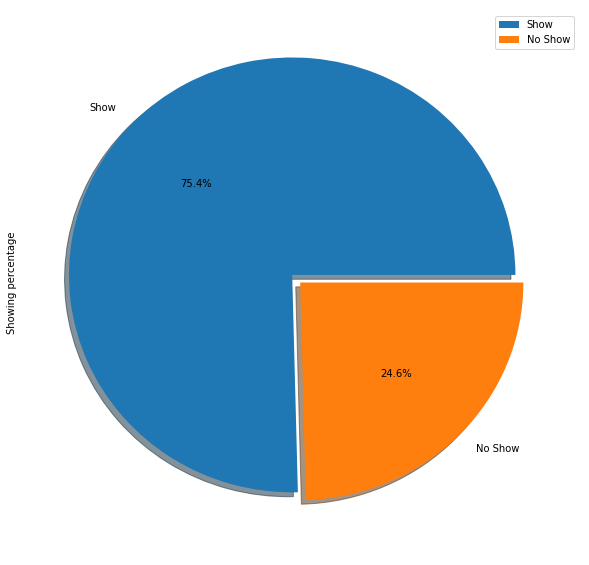

In [284]:
plt.figure(figsize=(10,10))
df['no_show'].value_counts().plot(kind ='pie', labels=['Show', 'No Show'], explode=[0.05,0], shadow=True, autopct='%1.1f%%')
plt.ylabel('Showing percentage')
plt.legend();

looks like more than 70% of the appiontment has shown

### Research Question 2 (what are the factors that affect the show-up rate?)

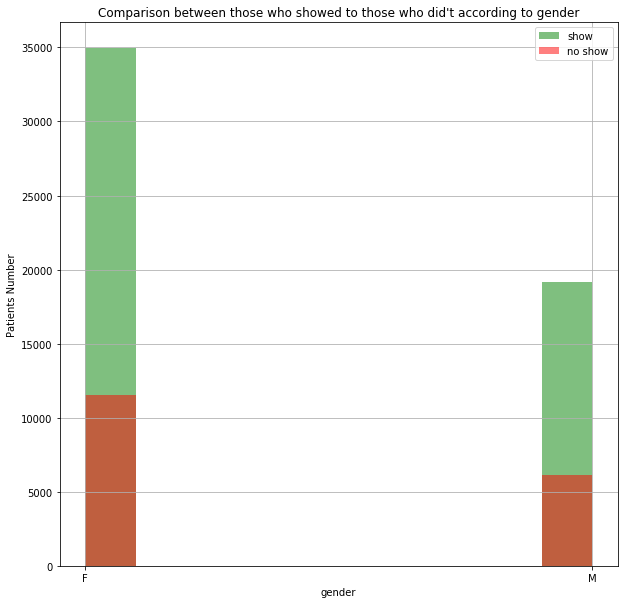

In [285]:
ploting_bar("gender", 'green')

In [286]:
df_show.gender.value_counts()

F    34956
M    19193
Name: gender, dtype: int64

In [287]:
df_noshow.gender.value_counts()

F    11505
M     6157
Name: gender, dtype: int64

Gender doesn's affect 
- females are more than males in showing and no-showing

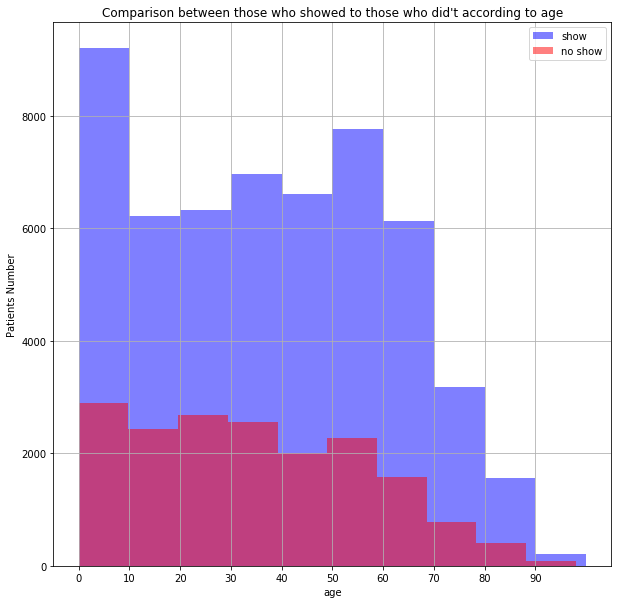

In [288]:
ploting_bar('age', 'blue')
plt.xticks(np.arange(0, 100, step=10));

Age does affect 
- Kids under 10 years are 3 times alike to show, which mean thier parents are carful
- From 10 to 30 still show more put less committed
- The Range of 50-60 years old people are much alike to show  

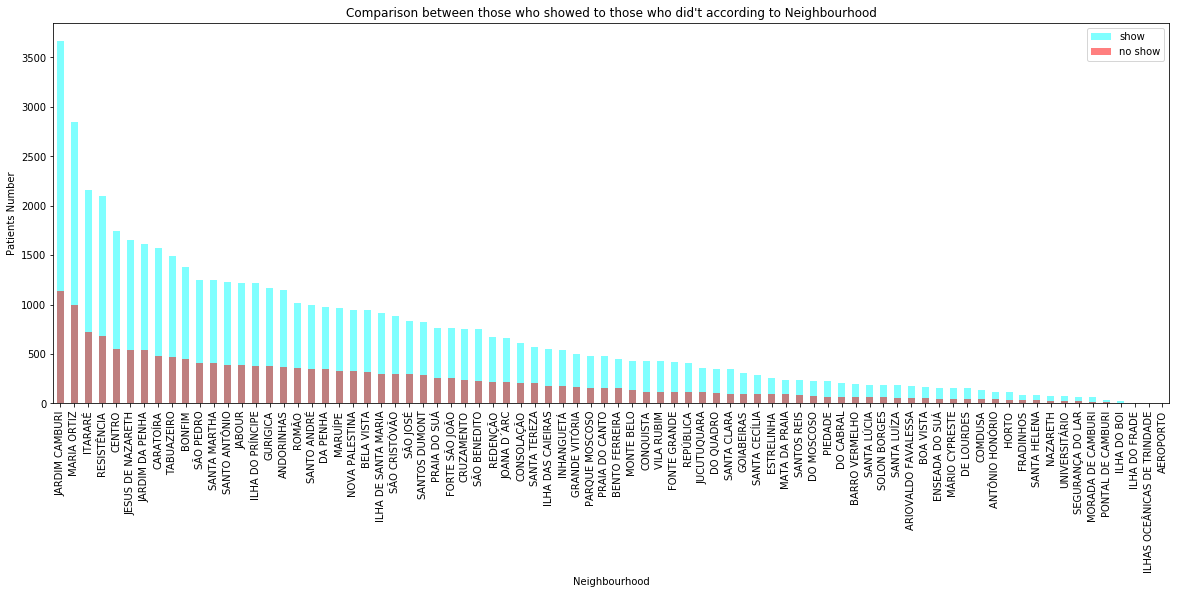

In [289]:
plt.figure(figsize=(20,7))
df_show.neighbourhood.value_counts().plot(kind='bar', alpha= 0.5, label = 'show', color='cyan')
df_noshow.neighbourhood.value_counts().plot(kind='bar', alpha= 0.5, label = 'no show', color='red')
plt.title("Comparison between those who showed to those who did't according to Neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Patients Number")
plt.legend();

Neighbourhood does affect, even though the people in ' JARDI CAMBURI' and ' MARIA ORTIZ' still show in a big percent


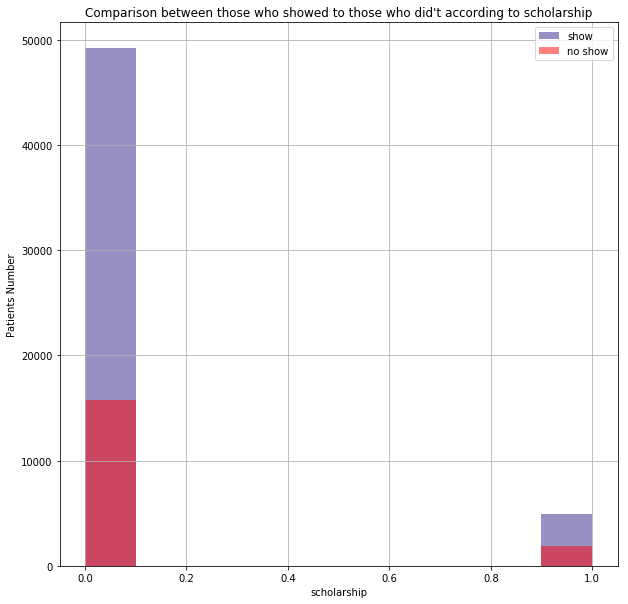

In [290]:
ploting_bar('scholarship', '#332288')

In [291]:
df_show.scholarship.value_counts()

0    49203
1     4946
Name: scholarship, dtype: int64

In [292]:
df_noshow.scholarship.value_counts()

0    15747
1     1915
Name: scholarship, dtype: int64

scholarship doesn't affect, it's the same percentage


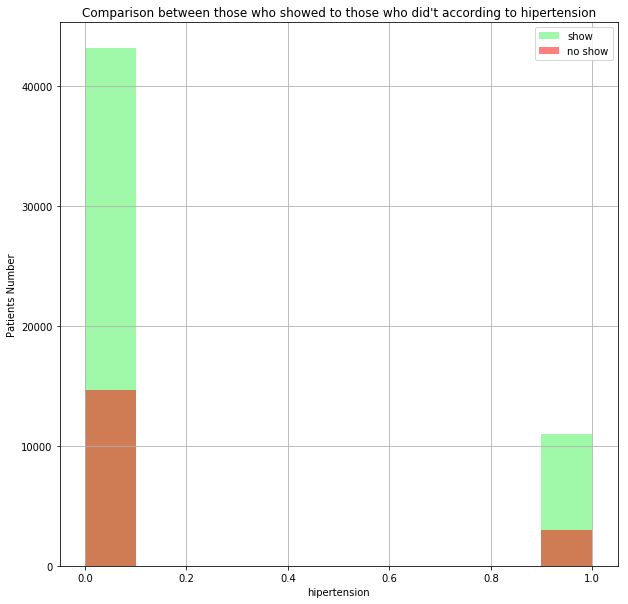

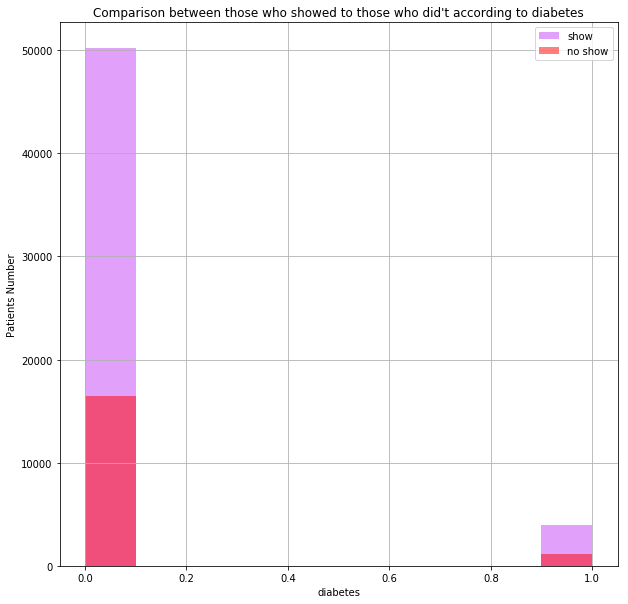

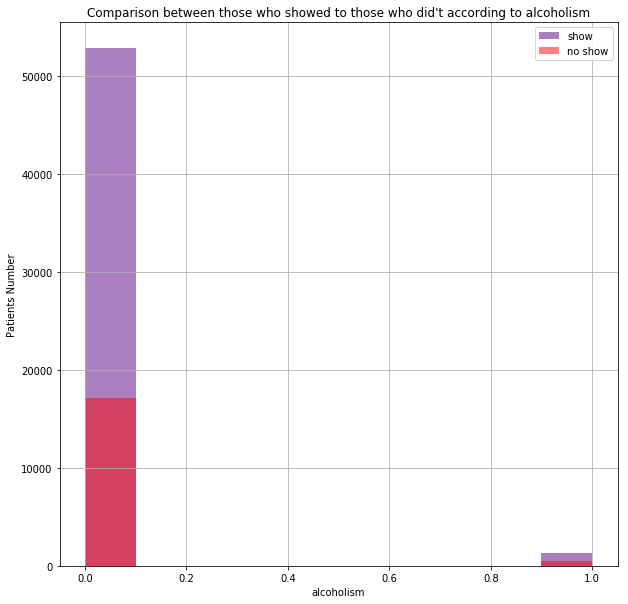

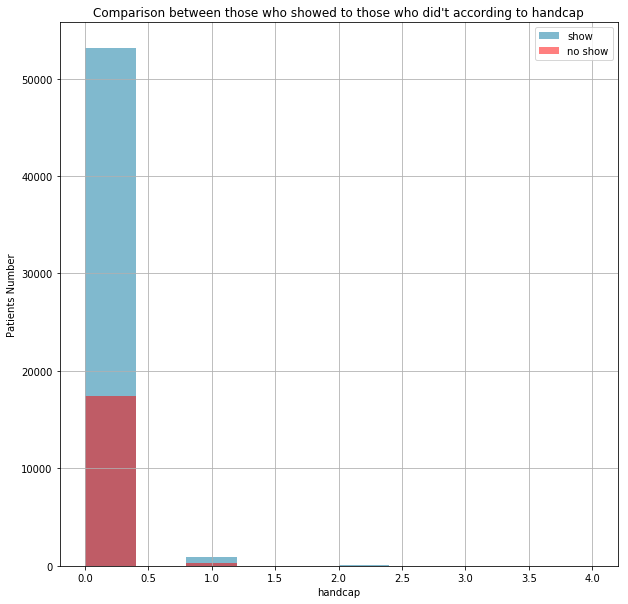

In [293]:
ploting_bar('hipertension', '#42f554')
ploting_bar('diabetes', '#c542f5')
ploting_bar('alcoholism', '#5b0085')
ploting_bar('handcap', '#03759e')

- Hipertension doesn't affect, it's the same percentage
- Diabetes doesn't affect, it's the same percentage
- Alcoholism doesn't affect, it's the same percentage
- Handcap doesn't affect, it's the same percentage

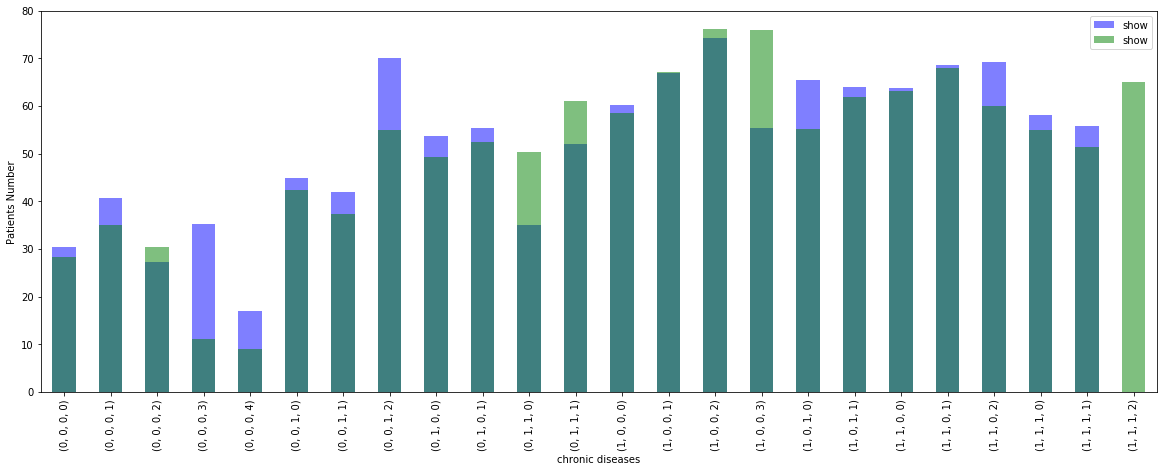

In [294]:
plt.figure(figsize=(20,7))
df_show.groupby(['hipertension', 'diabetes', 'alcoholism', 'handcap']).mean()['age'].plot(alpha=0.5, kind='bar',color='blue',label="show")
df_noshow.groupby(['hipertension', 'diabetes', 'alcoholism', 'handcap']).mean()['age'].plot(alpha=0.5, kind='bar',color='g',label="show")
plt.xlabel('chronic diseases')
plt.ylabel("Patients Number")
plt.legend();

In [295]:
df_show.groupby(['hipertension', 'diabetes', 'alcoholism', 'handcap']).mean()['age']

hipertension  diabetes  alcoholism  handcap
0             0         0           0          30.354856
                                    1          40.613995
                                    2          27.178571
                                    3          35.250000
                                    4          17.000000
                        1           0          44.988717
                                    1          42.000000
                                    3          70.000000
              1         0           0          53.752976
                                    1          55.478261
                                    2          35.000000
                        1           0          52.029412
1             0         0           0          60.227055
                                    1          66.897436
                                    2          74.352941
                        1           0          55.397403
                                    1       

**mean age of non chronic diseases showing patients is 30 and non showing is 28 mean age of Hypertensive diabetic showing patients is around 64 and non
showing is about 63 which means that there is a correlation between age and chronic diseases**

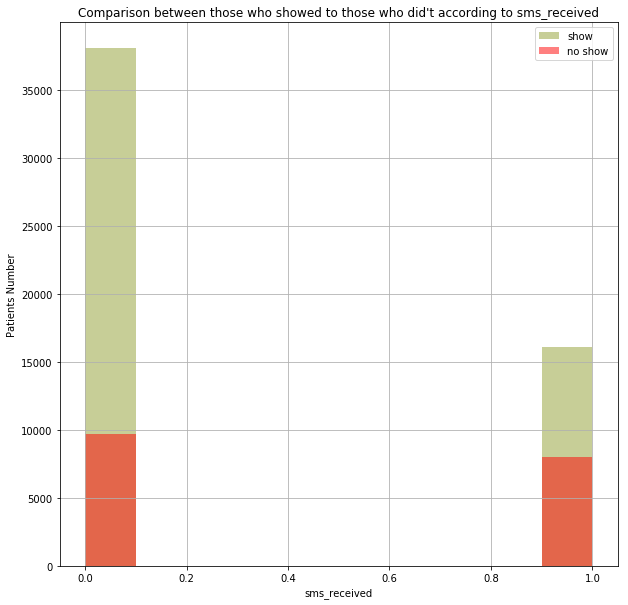

In [296]:
ploting_bar('sms_received', '#919e31')

SMS received doesn't affect
- even the people who show and and didn't recive the message are more 

<a id='conclusions'></a>
# Conclusions

- Kids under 10 years and 50-60 years old people are more alike to show.
- At the end, I can say that neighbourhood is strongly related to the patiens showing up at the clinic.
- Although it sounds strange, more people showed without receiving an SMS.
- there is a correlation between age and chronic diseases, but no cocorrelation between attendance and chronic diseases

**limitations** 
- couldn't find any useful corrolation in Gender, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap.
- I think if ther more feature such as the Person's job status or the weather that day it will be so useful.
- There was some weird ages which was less than 0 years old


In [297]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0